# **Análisis a macro-nivel: variación en el número de accidentes en Bélgica?**

# I. Importaciones
## I.1. Importaciones librerías

In [1]:
import import_ipynb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot    #if not: errormessage when iplot(fig)
from plotly.subplots import make_subplots

#para tener resultados satisfactorios en Jupyter Notebook:
%matplotlib inline

## I.2. Importación ficheros propios

In [2]:
from utils.functions import sumar_total_acc_por_ano

In [3]:
#nº total de accidentes por distrito por año en Bélgica
acc_por_zona_2020 = pd.read_csv("Data_ACC/acc_por_zona_2020.csv")
acc_por_zona_2019 = pd.read_csv("Data_ACC/acc_por_zona_2019.csv")
acc_por_zona_2018 = pd.read_csv("Data_ACC/acc_por_zona_2018.csv")
acc_por_zona_2017 = pd.read_csv("Data_ACC/acc_por_zona_2017.csv")
acc_por_zona_2016 = pd.read_csv("Data_ACC/acc_por_zona_2016.csv")
acc_por_zona_2012 = pd.read_csv("Data_ACC/acc_por_zona_2012.csv")
acc_por_zona_2008 = pd.read_csv("Data_ACC/acc_por_zona_2008.csv")

#nº total de accidentes por distrito por año en Bélgica - ordenado de manera ascendiente
sorted_acc_por_zona_2020 = pd.read_csv("Data_ACC/acc_por_zona_2020.csv")
sorted_acc_por_zona_2019 = pd.read_csv("Data_ACC/acc_por_zona_2019.csv")
sorted_acc_por_zona_2018 = pd.read_csv("Data_ACC/acc_por_zona_2018.csv")
sorted_acc_por_zona_2017 = pd.read_csv("Data_ACC/acc_por_zona_2017.csv")
sorted_acc_por_zona_2016 = pd.read_csv("Data_ACC/acc_por_zona_2016.csv")
sorted_acc_por_zona_2012 = pd.read_csv("Data_ACC/acc_por_zona_2012.csv")
sorted_acc_por_zona_2008 = pd.read_csv("Data_ACC/acc_por_zona_2008.csv")

#nº total de habitantes por distrito por año en Bélgica
pobl_2020_habxarr = pd.read_csv("Data_ACC/pobl_2020_habxarr.csv")
pobl_2019_habxarr = pd.read_csv("Data_ACC/pobl_2019_habxarr.csv")
pobl_2018_habxarr = pd.read_csv("Data_ACC/pobl_2018_habxarr.csv")
pobl_2017_habxarr = pd.read_csv("Data_ACC/pobl_2017_habxarr.csv")
pobl_2016_habxarr = pd.read_csv("Data_ACC/pobl_2016_habxarr.csv")
pobl_2012_habxarr = pd.read_csv("Data_ACC/pobl_2012_habxarr.csv")

#nº total de habitantes en Bélgica por año
hab_2020_BE = pd.read_csv("Data_ACC/hab_2020_BE.csv")
hab_2019_BE = pd.read_csv("Data_ACC/hab_2019_BE.csv")
hab_2018_BE = pd.read_csv("Data_ACC/hab_2018_BE.csv")
hab_2017_BE = pd.read_csv("Data_ACC/hab_2017_BE.csv")
hab_2016_BE = pd.read_csv("Data_ACC/hab_2016_BE.csv")
hab_2012_BE = pd.read_csv("Data_ACC/hab_2012_BE.csv")

#densidad de la población por distrito por año en Bélgica
dens_2012_xarr = pd.read_csv("Data_ACC/dens_2012_xarr.csv")
dens_2016_xarr = pd.read_csv("Data_ACC/dens_2016_xarr.csv")
dens_2017_xarr = pd.read_csv("Data_ACC/dens_2017_xarr.csv")
dens_2018_xarr = pd.read_csv("Data_ACC/dens_2018_xarr.csv")
dens_2019_xarr = pd.read_csv("Data_ACC/dens_2019_xarr.csv")
dens_2020_xarr = pd.read_csv("Data_ACC/dens_2020_xarr.csv")

#densidad de la población por año a nivel de Bélgica
dens_BE_anos = pd.read_csv("Data_ACC/dens_BE_anos.csv")

#evolución de la flota en Bélgica - 2008, 2012, 2016-2020
flota = pd.read_csv("Data_ACC/flota.csv")

#superficie en Bélgica x distrito - constante a lo largo de los años
superficie = pd.read_csv("Data_ACC/superficie.csv")

#nº accidentes a nivel de mes
acc_2020_mes = pd.read_csv("Data_ACC/acc_2020_por_mes.csv")
acc_2019_mes = pd.read_csv("Data_ACC/acc_2019_por_mes.csv")
acc_2018_mes = pd.read_csv("Data_ACC/acc_2018_por_mes.csv")
acc_2017_mes = pd.read_csv("Data_ACC/acc_2017_por_mes.csv")
acc_2016_mes = pd.read_csv("Data_ACC/acc_2016_por_mes.csv")
acc_2012_mes = pd.read_csv("Data_ACC/acc_2012_por_mes.csv")
acc_2008_mes = pd.read_csv("Data_ACC/acc_2008_por_mes.csv")

In [31]:
#verificaciones del éxito de la importación:
# 1/2 verificación:
acc_por_zona_2017.head(2)

,PROV,ADM_DSTR,Nº ACC
0,Arr. Brussel-Hfdstad[no Prov],Arrondissement Brussel-Hoofdstad,3819
1,Provincie Antwerpen,Arrondissement Antwerpen,4215


In [32]:
# 2/2 verificación:
dens_2020_xarr.head(2)

,Unnamed: 0,REGION,PROV,ADM_DSTR,PROPORTION_POP_BE,DENSITY(hab/km2)
0,0,Vlaams Gewest,Provincie Antwerpen,Arrondissement Antwerpen,0.092036,1053.253238
1,1,Vlaams Gewest,Provincie Antwerpen,Arrondissement Mechelen,0.030204,678.203780


# II. Exploración de los datos importados en función de la evolución del número total de accidentes a lo largo de los años

In [8]:
#ejemplo en base al año 2008:
acc_por_zona_2008.sample()

,PROV,ADM_DSTR,Nº ACC
6,Provincie Henegouwen,Arrondissement Charleroi,1600


# III. Limpieza y análisis de los datos en función del número de accidentes a lo largo de los años

## III.1. Cifras puras del número de accidentes en Bélgica

In [4]:
#extraer los totales por año en una lista:
lista_acc_por_ano = [acc_por_zona_2008, acc_por_zona_2012, acc_por_zona_2016, acc_por_zona_2017, acc_por_zona_2018, acc_por_zona_2019, acc_por_zona_2020]
acc_por_ano = sumar_total_acc_por_ano(lista_acc_por_ano)
acc_por_ano

[48430, 44051, 39890, 37827, 38260, 37520, 30102]

In [5]:
elementos_evo_acc = [["2008","2012","2016","2017", "2018","2019","2020"], acc_por_ano]

In [6]:
# columnas a filas:
pd.DataFrame(elementos_evo_acc).transpose()

,0,1
0,2008,48430
1,2012,44051
2,2016,39890
3,2017,37827
4,2018,38260
5,2019,37520
6,2020,30102


In [70]:
elementos_evo_acc = [["2008","2012","2016","2017", "2018","2019","2020"], acc_por_ano]

evo_acc = pd.DataFrame(elementos_evo_acc).transpose()
evo_acc.columns = [['Year', 'Nº Accidents']]
evo_acc

,Year,Nº Accidents
0,2008,48430
1,2012,44051
2,2016,39890
3,2017,37827
4,2018,38260
5,2019,37520
6,2020,30102


# III.2 Creación gráfica

In [71]:
# Creating trace1
trace1 = go.Scatter(
                    x = elementos_evo_acc[0],
                    y = acc_por_ano,
                    name = 'Nº of Accidents',       #esto es lo que aparece en leyenda
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = evo_acc['Year'],
                    )
data = [trace1]

layout = dict(title = 'Evolution in nº of Accidents [BE]',
             xaxis= dict(title= 'Year',ticklen= 5), yaxis= dict(title = "Nº Acc")
           )

fig = go.Figure(data = data, layout=layout)
fig.update(layout_yaxis_range=[0,50000] )

iplot(fig)

## III.3. Relación con parámetros determinados

### III.3.1. Verificación de la evolución en el nº de accidentes a lo largo de los años con la evolución de la **flota** a lo largo de los años.

### a) Primer intento de merge:

In [ ]:
evo_acc_rel_flota = pd.merge(evo_acc, flota)
#error message: no common columns

### b) En busca de solución para el problema

In [ ]:
evo_acc

,Year,Nº Accidents
0,2008,48430
1,2012,44051
2,2016,39890
3,2017,37827
4,2018,38260
5,2019,37520
6,2020,30102


In [ ]:
flota

,Year,Total_flota
0,2008,6482033
1,2012,6920791
2,2016,7301766
3,2017,7419405
4,2018,7533172
5,2019,7614082
6,2020,7651138


In [ ]:
evo_acc.columns

MultiIndex([(        'Year',),
            ('Nº Accidents',)],
           )

In [ ]:
flota.columns

Index(['Year', 'Total_flota'], dtype='object')

Al aparecer, los índices como títulos de columnas en evo_acc son en realidad multiíndices? Necesitamos convertir al mismo formato que los títulos de columnas de flota.

In [ ]:
#convertir multiíndices a índices
evo_acc = evo_acc.reset_index(level=[0], inplace=True)
evo_acc

In [ ]:
#limpiar resultado obtenido
evo_acc = evo_acc.drop(columns=["index"])
evo_acc
#error message: NonType object

In [ ]:
#check:
evo_acc.columns
#error message: NonType object

### c) Otro intento de merge

In [ ]:
evo_acc_rel_flota = pd.merge(evo_acc, flota)
evo_acc_rel_flota
#sigue dando mismo error... - adaptaciones en 1.2.2, sin resolver...

### d) Reconstrucción dataframe evo_acc

In [ ]:
evo_acc = pd.DataFrame({"Year": ["2008","2012","2016","2017", "2018","2019","2020"], "Nº Accidents": acc_por_ano})
evo_acc

,Year,Nº Accidents
0,2008,48430
1,2012,44051
2,2016,39890
3,2017,37827
4,2018,38260
5,2019,37520
6,2020,30102


### e) Nuevo intento de merge:

In [ ]:
evo_acc_rel_flota = pd.merge(evo_acc,flota)
evo_acc_rel_flota
#error message: merge on object and int64 type

### f) Intento de solucionar el problema

In [ ]:
#verificar tipo de las claves para merge:
#1) clave de flota:
flota.dtypes

Year           int64
Total_flota    int64
dtype: object

In [ ]:
#2)clave de evo_acc
evo_acc.dtypes

Year            object
Nº Accidents     int64
dtype: object

Confirmación de no correspondencia del tipo de las claves por 'merge'. Convertimos el tipo de la clave de flota a tipo 'object' para conseguir correspondencia con el tipo de la clave de 'evo_acc'.

In [ ]:
flota["Year"] = flota["Year"].astype(str)

In [ ]:
#verificación de la conversión: positiva
flota.dtypes

Year           object
Total_flota     int64
dtype: object

### c) Hacia un merge con éxito

In [ ]:
evo_acc_rel_flota = pd.merge(evo_acc, flota)
evo_acc_rel_flota

,Year,Nº Accidents,Total_flota
0,2008,48430,6482033
1,2012,44051,6920791
2,2016,39890,7301766
3,2017,37827,7419405
4,2018,38260,7533172
5,2019,37520,7614082
6,2020,30102,7651138


### III.3.2. En segundo lugar, relacionamos la evolución en el nº de accidentes con la evolución en la **densidad de la población** a lo largo de los años

### a) primer intento de merge:

In [ ]:
evo_acc_rel_flota_dens = pd.merge(evo_acc_rel_flota, dens_BE_anos)
#error message: merge on object and int64

In [80]:
evo_acc_rel_flota.dtypes

Year            object
Nº Accidents     int64
Total_flota      int64
dtype: object

In [ ]:
dens_BE_anos.dtypes

Year         int64
density    float64
dtype: object

In [81]:
dens_BE_anos["Year"] = dens_BE_anos["Year"].astype(str)

### b) nuevo intento de merge:

In [82]:
evo_acc_rel_flota_dens = pd.merge(evo_acc_rel_flota, dens_BE_anos)

In [83]:
evo_acc_rel_flota_dens

,Year,Nº Accidents,Total_flota,Density
0,2012,44051,6920791,363.51
1,2016,39890,7301766,371.23
2,2017,37827,7419405,373.02
3,2018,38260,7533172,374.82
4,2019,37520,7614082,372.49
5,2020,30102,7651138,374.49


# III.4 Creación gráfica

In [115]:
#take into account different values y-axix
#visualisazión de las relaciones estudiadas: evolución accidentes, flota, densidad

figure = figsize = (20,30 )

trace1 = go.Scatter(
    x=evo_acc_rel_flota_dens["Year"],
    y=evo_acc_rel_flota_dens["Nº Accidents"],
    xaxis='x1',
    yaxis='y1',
    name = "Evolution Nº Accidents"
)
trace2 = go.Scatter(
    x=evo_acc_rel_flota_dens["Year"],
    y=evo_acc_rel_flota_dens["Total_flota"],
    xaxis='x2',
    yaxis='y2',
    name = "Evolution Fleet"
)
trace3 = go.Scatter(
    x=evo_acc_rel_flota_dens["Year"],
    y=evo_acc_rel_flota_dens["Density"],
    xaxis='x3',
    yaxis='y3',
    name = "Evolution Density"
)


data = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.9],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.3],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0, 0.9],
        anchor='y2'
    ),
        yaxis2=dict(
        domain=[0.35, 0.65],
        anchor='x2'
    ),
    xaxis3=dict(
        domain=[0, 0.9],
        anchor='y3'
    ),
    yaxis3=dict(
        domain=[0.7,1],
        anchor='x3'
    ),
        title = 'Evolution Nº of Accidents, Fleet, Density'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# IV. Exploración de los datos importados (número de accidentes) en función del periodo concreto 

## IV.1 Construcción, limpieza y análisis de los datos

In [55]:
#verificación dtype de los datos introducidos
acc_2008_mes.dtypes

Nº ACC    int64
dtype: object

In [65]:
# calcular promedio al mes por año en base a periodo más largo determinado, redondear resultado 
acc_mes = (acc_2008_mes + acc_2012_mes + acc_2016_mes + acc_2017_mes + acc_2018_mes + acc_2019_mes + acc_2020_mes) / 7
acc_mes = acc_mes.round(2)
acc_mes

,Nº ACC
0,3079.00
1,2901.86
2,3014.43
3,2937.71
4,3620.86
5,3639.43
6,3199.57
7,3249.71
8,3713.00
9,3731.14


In [66]:
acc_mes = acc_mes.set_axis(['Ene', 'Feb', 'Mar', 'Abr', 'Mayo', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'], axis=0)
acc_mes

,Nº ACC
Ene,3079.00
Feb,2901.86
Mar,3014.43
Abr,2937.71
Mayo,3620.86
Jun,3639.43
Jul,3199.57
Ago,3249.71
Sept,3713.00
Oct,3731.14


In [70]:
#todos los datos como valores en el DF
acc_mes = acc_mes.reset_index(level=0)
acc_mes

,index,Nº ACC
0,Ene,3079.00
1,Feb,2901.86
2,Mar,3014.43
3,Abr,2937.71
4,Mayo,3620.86
5,Jun,3639.43
6,Jul,3199.57
7,Ago,3249.71
8,Sept,3713.00
9,Oct,3731.14


In [72]:
acc_mes = acc_mes.rename({"index":"MONTH"}, axis = 1)
acc_mes

,MONTH,Nº ACC
0,Ene,3079.00
1,Feb,2901.86
2,Mar,3014.43
3,Abr,2937.71
4,Mayo,3620.86
5,Jun,3639.43
6,Jul,3199.57
7,Ago,3249.71
8,Sept,3713.00
9,Oct,3731.14


In [67]:
#problema con concatentte!   vista buena, pero subyacentemente...
#acc_mes = pd.concat([acc_2008_mes, acc_2012_mes, acc_2016_mes, acc_2017_mes, acc_2018_mes, acc_2019_mes, acc_2020_mes], axis=1)
#acc_mes

In [68]:
#acc_mes = pd.DataFrame(acc_mes)
#acc_mes.columns

In [79]:
acc_mes.describe()

,Nº ACC
count,12.000000
mean,3286.665833
std,311.403398
min,2901.860000
25%,3042.712500
50%,3224.640000
75%,3625.502500
max,3731.140000


## IV.2 Gráfica: visualización

In [78]:
# import graph objects as "go"
import plotly.graph_objs as go

# create trace1 
trace1 = go.Bar(x = acc_mes['MONTH'],
               y = acc_mes['Nº ACC'],
               name = 'accidents',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = acc_mes['Nº ACC'])

data = [trace1]

layout = go.Layout(barmode = "group", title = "Number of Accidents on a monthly basis (mean over several years)")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

# todo lo de abajo: borrador

<AxesSubplot:xlabel='DENSITY(hab/km2)', ylabel='Density'>

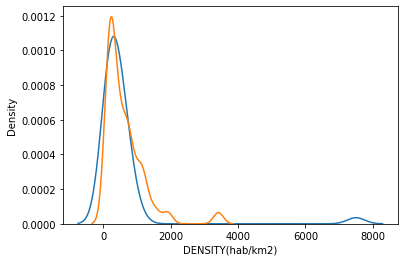

In [ ]:
sns.kdeplot(df2['DENSITY(hab/km2)'], bw_adjust=0.5)
sns.kdeplot(df1['MS_ACCT'], bw_adjust=0.5)

In [ ]:
df3.corr()

,PROPORTION_POP_BE,DENSITY(hab/km2),MS_ACCT
PROPORTION_POP_BE,1.000000,0.704134,0.962864
DENSITY(hab/km2),0.704134,1.000000,0.738317
MS_ACCT,0.962864,0.738317,1.000000


Text(0.5, 1.0, 'Trafic Accidents in Belgium: correlations')

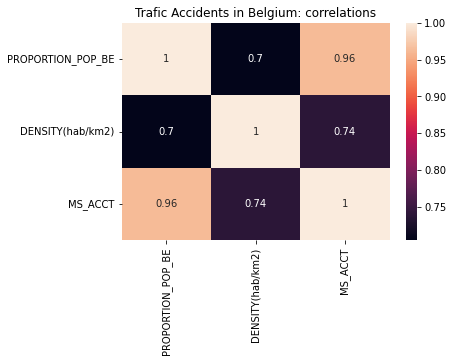

In [ ]:
heatmap_n_acc = sns.heatmap(df3.corr(), annot = True)
heatmap_n_acc.set_title("Trafic Accidents in Belgium: correlations")
# => no hay correlación significativa